In [116]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


## discretizing the price
#### the loaded dataseet here is the resultant dataset of the Cleaning Notebook
we are extracting the total_amount feature from the dataset , and discretizing it 
It was noticed that amount_fare is just the summation of : 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'  ,  so we removed these features from the dataset because their presence will convert the classification task to a simple summation of these features.

In [109]:
import pandas as pd

# Load  dataset
cleanedDS = pd.read_csv('green_tripdata_2019-03_cleaned.csv')

# Extracting the total_amount column and removing it from the dataset
total_amount_column = cleanedDS.pop('total_amount')

# Removing columns that sum up to total_amount
columns_to_drop = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']
cleanedDS = cleanedDS.drop(columns=columns_to_drop)

# Discretizing the labels using Quartiles
labels = pd.qcut(total_amount_column, q=3, labels=['low', 'medium', 'high'])

# Replacing 'low', 'medium', 'high' with 0, 1, 2 respectively
labels = labels.replace({'medium': 1, 'low': 0, 'high': 2})

# Save the labels to a CSV file
labels.to_csv("labels.csv", index=False)

# saving the cleaned dataset without the label columns
cleanedDS.to_csv("green_tripdata_2019-03_cleaned_removed_label.csv", index=False)

# Print the results to verify
print(labels)
print(cleanedDS)


0         0
1         0
2         0
3         0
4         0
         ..
643032    0
643033    0
643034    1
643035    1
643036    0
Name: total_amount, Length: 643037, dtype: category
Categories (3, int64): [0 < 1 < 2]
       lpep_pickup_datetime lpep_dropoff_datetime  store_and_fwd_flag  \
0       2019-03-01 00:02:21   2019-03-01 00:04:52                   0   
1       2019-03-01 00:42:31   2019-03-01 00:47:42                   0   
2       2019-03-01 00:15:53   2019-03-01 00:18:37                   0   
3       2019-02-28 23:55:58   2019-03-01 00:01:30                   0   
4       2019-03-01 00:55:58   2019-03-01 00:58:12                   0   
...                     ...                   ...                 ...   
643032  2019-04-01 00:31:24   2019-04-01 00:38:28                   0   
643033  2019-04-01 00:48:30   2019-04-01 00:58:28                   0   
643034  2019-04-01 00:04:42   2019-04-01 00:16:50                   0   
643035  2019-04-01 00:01:51   2019-04-01 00:10:34  

## Further PreProcessing for the Dataset:
#### 1) converting TRUE, FALSE to be Numeric (1,0)
#### 2) grouping the Mutually Exclusive Features into one Feature , For Example:  
##### Features : payment_type_cash', 'payment_type_credit_card', 'payment_type_dispute', 'payment_type_no_charge', 'payment_type_unknown'     can be grouped to one Feature payment_type with values 0 t0 4

In [110]:
cleanedDS = cleanedDS.map(lambda x: 1 if x == 'True' else (0 if x == 'False' else x))

cleanedDS['payment_type'] = cleanedDS.apply(
    lambda row: 0 if row['payment_type_cash'] == True else
                1 if row['payment_type_credit_card'] == True else
                2 if row['payment_type_dispute'] == True else
                3 if row['payment_type_no_charge'] == True else
                4, axis=1)
cleanedDS = cleanedDS.drop(columns=['payment_type_cash', 'payment_type_credit_card', 'payment_type_dispute', 'payment_type_no_charge', 'payment_type_unknown'])

#cleanedDS.to_csv("test.csv")



#### Doing the same for rate_type

In [111]:
## rate_type_jfk	rate_type_jfk rate_type_nassau_or_westchester	rate_type_negotiated_fare	rate_type_newark	rate_type_standard_rate	rate_type_unknown

cleanedDS['rate_type'] = cleanedDS.apply(
    lambda row: 0 if row['rate_type_jfk'] == True else
                1 if row['rate_type_nassau_or_westchester'] == True else
                2 if row['rate_type_negotiated_fare'] == True else
                3 if row['rate_type_newark'] == True else
                4 if row['rate_type_standard_rate'] == True else
                5, axis=1)
cleanedDS = cleanedDS.drop(columns=['rate_type_jfk','rate_type_nassau_or_westchester', 'rate_type_negotiated_fare', 'rate_type_newark', 'rate_type_standard_rate', 'rate_type_unknown'])

#cleanedDS.to_csv("test.csv")

#### Doing the same for Vendor


In [112]:
cleanedDS['vendor'] = cleanedDS.apply(
    lambda row: 0 if row['vendor_creative_mobile_technologies_llc'] == True else
                1, axis=1)
cleanedDS = cleanedDS.drop(columns=['vendor_verifone_inc','vendor_creative_mobile_technologies_llc'])

#cleanedDS.to_csv("test.csv")


### Replacing True and False of other columns with 1 and 0


In [113]:
cleanedDS = cleanedDS.replace({True: 1, False: 0})
cleanedDS.to_csv("cleaned_DataSet_2.csv",index=False)





### Extracting useful features from the Date and Time

In [115]:
cleanedDS=pd.read_csv("cleaned_DataSet_2.csv")
# Convert datetime columns to datetime type
cleanedDS['lpep_pickup_datetime'] = pd.to_datetime(cleanedDS['lpep_pickup_datetime'])
cleanedDS['lpep_dropoff_datetime'] = pd.to_datetime(cleanedDS['lpep_dropoff_datetime'])

# Extract features from datetime

# year  will be the same for all examples , so we will not add it as a separate feature
#cleanedDS['pickup_year'] = cleanedDS['lpep_pickup_datetime'].dt.year
cleanedDS['pickup_month'] = cleanedDS['lpep_pickup_datetime'].dt.month
cleanedDS['pickup_day'] = cleanedDS['lpep_pickup_datetime'].dt.day
cleanedDS['pickup_hour'] = cleanedDS['lpep_pickup_datetime'].dt.hour
cleanedDS['pickup_minute'] = cleanedDS['lpep_pickup_datetime'].dt.minute
cleanedDS['pickup_dayofweek'] = cleanedDS['lpep_pickup_datetime'].dt.dayofweek
cleanedDS['pickup_dayofyear'] = cleanedDS['lpep_pickup_datetime'].dt.dayofyear
cleanedDS['pickup_weekofyear'] = cleanedDS['lpep_pickup_datetime'].dt.isocalendar().week
cleanedDS['pickup_is_weekend'] = cleanedDS['pickup_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Calculate trip duration in minutes
cleanedDS['trip_duration'] = (cleanedDS['lpep_dropoff_datetime'] - cleanedDS['lpep_pickup_datetime']).dt.total_seconds() / 60.0

# Drop original datetime columns if not needed
cleanedDS = cleanedDS.drop(columns=['lpep_pickup_datetime', 'lpep_dropoff_datetime'])



#week_number and pickup_weekofyear are duplicates , then we removed one of them
cleanedDS=cleanedDS.drop(columns=['week_number'])

##standardizing the new added features
##new_columns=['pickup_month','pickup_day','pickup_hour','pickup_minute','pickup_minute','pickup_dayofweek','pickup_dayofyear','pickup_weekofyear','pickup_is_weekend','trip_duration']
##scaler=StandardScaler()
##cleanedDS[new_columns]=scaler.fit_transform(cleanedDS[new_columns])



cleanedDS.to_csv("cleaned_DataSet_3.csv",index=False)


# 2) General Diagnostics for the dataset

In [117]:
df=pd.read_csv("cleaned_DataSet_3.csv")
labels=pd.read_csv("labels.csv")

### 1- Exploratory Data Analysis (EDA): Visualize the distributions and relationships between features

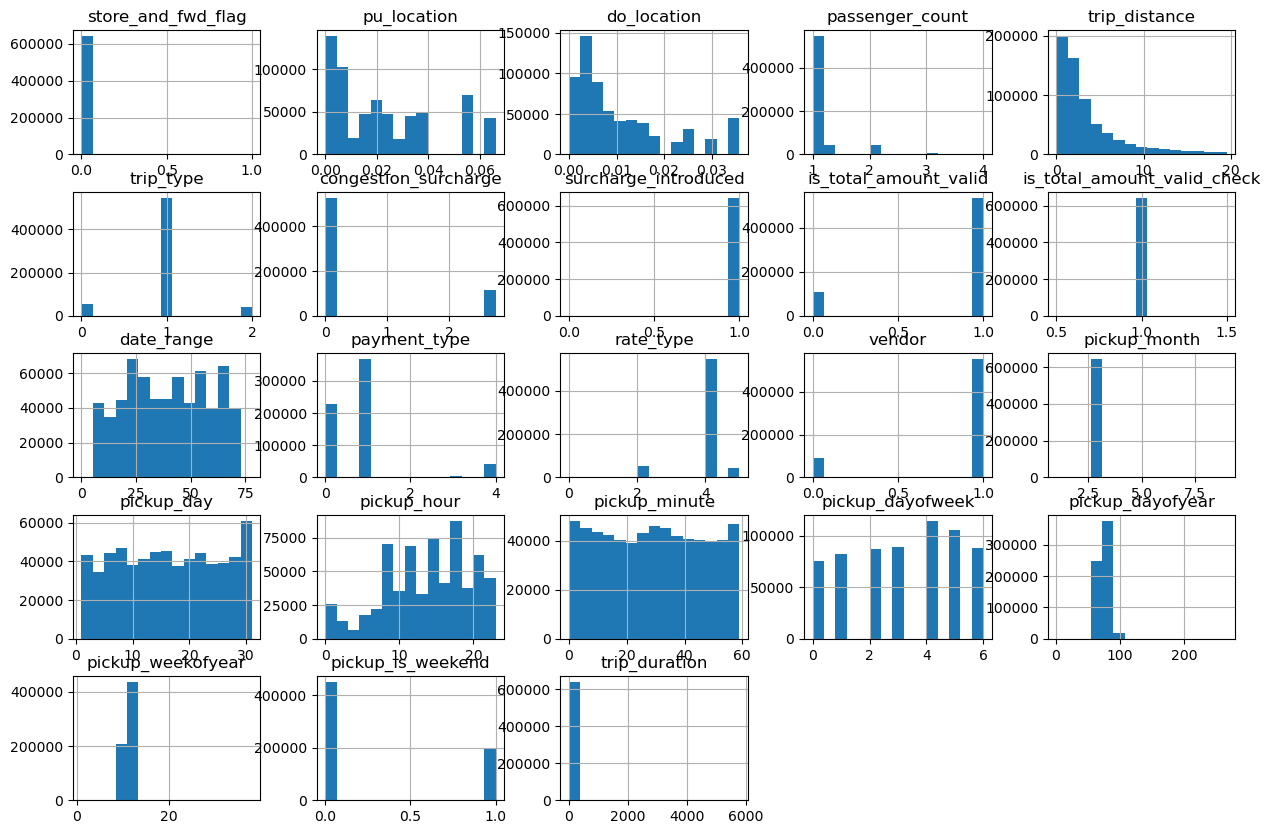

c:\Users\youssef\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


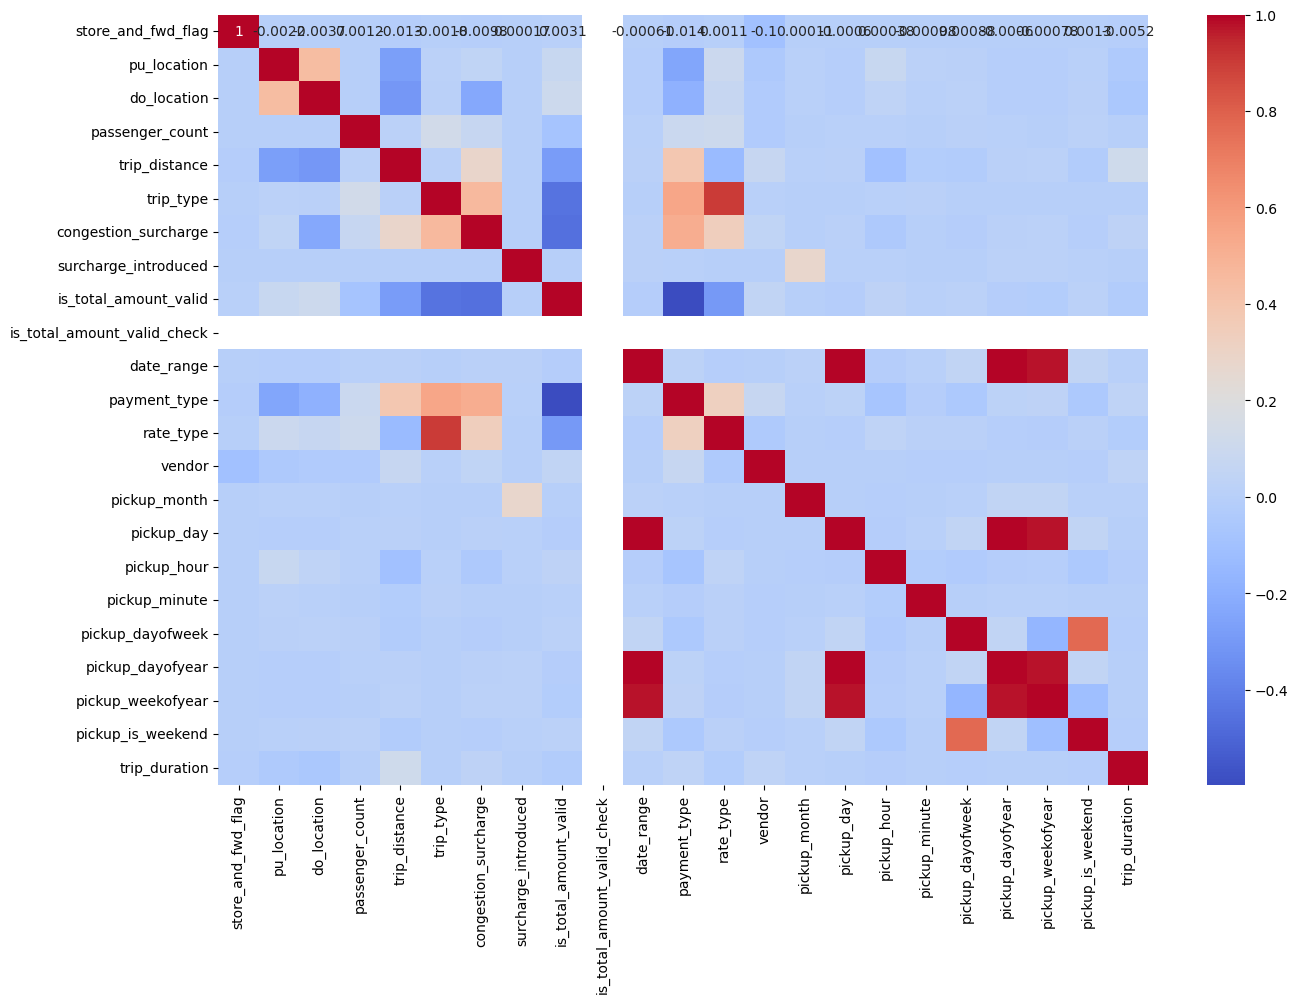

In [118]:

# Histograms for numerical features
df.hist(bins=15, figsize=(15, 10))
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### date_range , pickup_day , pickup_dayofyear , pickup_weekofyear , so we remove 3 of them and leave 1 

In [119]:
df=df.drop(columns=['date_range','pickup_dayofyear','pickup_weekofyear'])
df.to_csv("cleaned_DataSet_4.csv",index=False)

### first: KNN
The hyper-parameter to be tuned is k , we looped on valus 3-->5 only because of the very large runtime of this method.

3   :    0.8669756158248321
4   :    0.8627612590196566
Best number of neighbors: 3
Accuracy: 0.8669756158248321
Confusion Matrix:
[[39619  3591   129]
 [ 5175 34172  3487]
 [  435  4291 37709]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89     43339
           1       0.81      0.80      0.81     42834
           2       0.91      0.89      0.90     42435

    accuracy                           0.87    128608
   macro avg       0.87      0.87      0.87    128608
weighted avg       0.87      0.87      0.87    128608



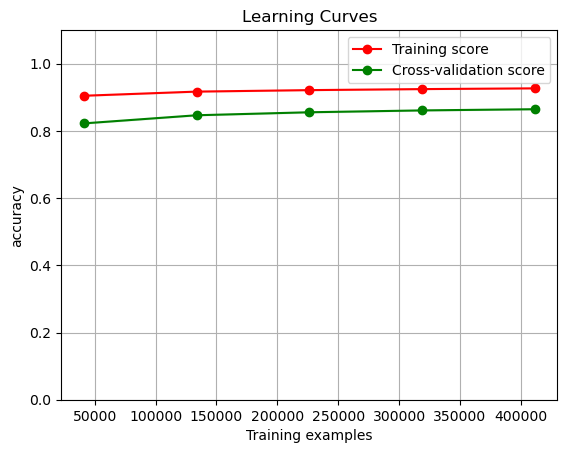

Cross-validation scores: [0.75968836 0.71425572 0.59080765 0.4740333  0.46820935]
Average cross-validation score: 0.6013988757313705


In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve, cross_val_score


df=pd.read_csv("cleaned_DataSet_4.csv")
labels=pd.read_csv("trip_price_labels.csv")
labels=labels.values.ravel()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)


# Loop to find the best number of neighbors
best_accuracy = 0
best_n_neighbors = 1
for k in range(3, 5):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(k,"  :   ",accuracy)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_neighbors = k
        best_model = knn

# Evaluate the best model
y_pred = best_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Best number of neighbors: {best_n_neighbors}')
print(f'Accuracy: {best_accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


# Plot learning curves
def plot_learning_curve(estimator, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title("Learning Curves")
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    plt.ylim(0.0, 1.1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    
    plt.legend(loc="best")
    return plt

# Plot learning curves for the best model
plot_learning_curve(best_model, X_train, y_train, cv=5)
plt.show()

# Perform cross-validation
cv_scores = cross_val_score(best_model, df, labels, cv=5)

print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores)}')

c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


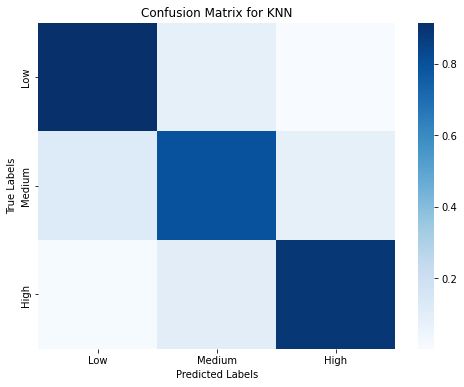

[[0.91416507 0.0828584  0.00297653]
 [0.12081524 0.79777747 0.08140729]
 [0.01025097 0.10111936 0.88862967]]


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
confusion_matrix = np.array([[39619,  3591,   129],
 [ 5175, 34172,  3487],
 [  435,  4291, 37709]])
row_sums = confusion_matrix.sum(axis=1)[:, np.newaxis]
normalized_confusion_matrix = confusion_matrix / row_sums

# Class labels
class_labels = ['Low', 'Medium', 'High']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion_matrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for KNN')
plt.show()
print(normalized_confusion_matrix)

#### The KNN method showed accuracy : Accuracy: 0.8669756158248321   with best k=3
#### The learning curves showed good results , it is neither overfitting nor underfitting

## second: NAIVE BEYE'S


Accuracy: 0.625
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73     43339
           1       0.46      0.40      0.43     42834
           2       0.80      0.61      0.69     42435

    accuracy                           0.63    128608
   macro avg       0.63      0.62      0.62    128608
weighted avg       0.63      0.63      0.62    128608

Confusion Matrix:
[[37251  5790   298]
 [19532 17231  6071]
 [ 2201 14312 25922]]


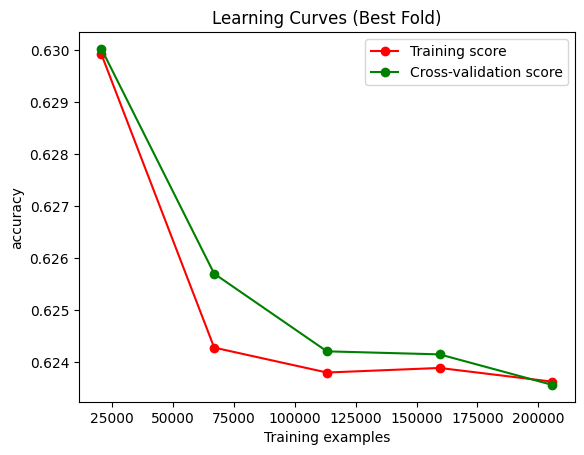

Cross-validation scores: [0.62267947 0.62276695 0.62390413 0.62535233 0.62418234]
Average cross-validation score: 0.624


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, cross_val_score

# Load the data
df = pd.read_csv("cleaned_DataSet_4.csv")
labels = pd.read_csv("trip_price_labels.csv")
labels = labels.values.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_scaled, y_train)

# Evaluate the model on the testing set
y_pred = nb_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Function to plot the best learning curve
def plot_best_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'):
    best_score = -np.inf
    best_train_sizes = None
    best_train_scores = None
    best_test_scores = None

    for train_index, test_index in cv.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[test_index]
        y_train_fold, y_val_fold = y[train_index], y[test_index]
        
        train_sizes_abs, train_scores, test_scores = learning_curve(estimator, X_train_fold, y_train_fold,
                                                                    train_sizes=train_sizes, scoring=scoring, cv=None, n_jobs=None)
        mean_test_scores = np.mean(test_scores, axis=1)

        if np.mean(mean_test_scores) > best_score:
            best_score = np.mean(mean_test_scores)
            best_train_sizes = train_sizes_abs
            best_train_scores = train_scores
            best_test_scores = test_scores

    plt.figure()
    plt.plot(best_train_sizes, np.mean(best_train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(best_train_sizes, np.mean(best_test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    plt.xlabel('Training examples')
    plt.ylabel(scoring)
    plt.title('Learning Curves (Best Fold)')
    plt.legend(loc="best")
    plt.show()

# Prepare cross-validation
cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Plot the best learning curve
plot_best_learning_curve(nb_model, X_train_scaled, y_train, cv=cv)

# Perform cross-validation
cv_scores = cross_val_score(nb_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores):.3f}')

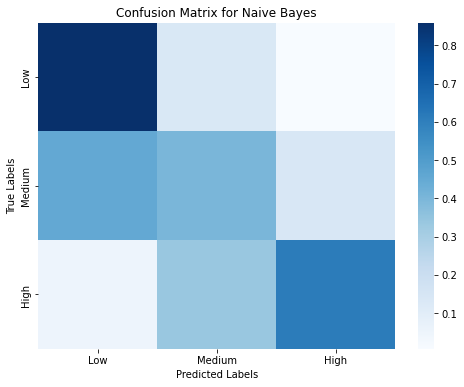

[[0.85952606 0.13359791 0.00687602]
 [0.4559929  0.40227389 0.1417332 ]
 [0.05186756 0.33726876 0.61086367]]


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
confusion_matrix = np.array([[37251,  5790,   298],
 [19532, 17231,  6071],
 [ 2201, 14312, 25922]])
row_sums = confusion_matrix.sum(axis=1)[:, np.newaxis]
normalized_confusion_matrix = confusion_matrix / row_sums

# Class labels
class_labels = ['Low', 'Medium', 'High']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion_matrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()
print(normalized_confusion_matrix)

## at very large number of examples , Naive Beyes showed a very bad performance

## Third : Logistic Regression

Accuracy: 0.844
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.89     43339
           1       0.77      0.78      0.78     42834
           2       0.91      0.84      0.87     42435

    accuracy                           0.84    128608
   macro avg       0.85      0.84      0.84    128608
weighted avg       0.85      0.84      0.84    128608

Confusion Matrix:
[[39489  3776    74]
 [ 5720 33563  3551]
 [  496  6398 35541]]


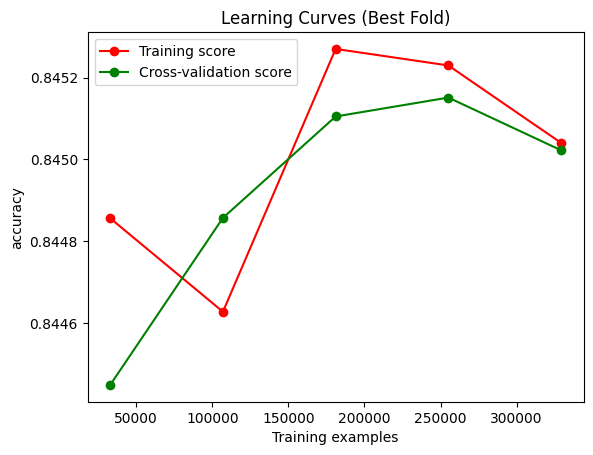

Cross-validation scores: [0.84489629 0.8444492  0.84423537 0.84465331 0.84515721]
Average cross-validation score: 0.845


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, GridSearchCV, cross_val_score

# Load the data
df = pd.read_csv("cleaned_DataSet_4.csv")
labels = pd.read_csv("trip_price_labels.csv")
labels = labels.values.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter space for tuning
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform grid search with cross-validation to tune the hyperparameter
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter and the corresponding model
best_C = grid_search.best_params_['C']
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Function to plot the best learning curve
def plot_best_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'):
    best_score = -np.inf
    best_train_sizes = None
    best_train_scores = None
    best_test_scores = None

    for train_index, test_index in cv.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[test_index]
        y_train_fold, y_val_fold = y[train_index], y[test_index]
        
        train_sizes_abs, train_scores, test_scores = learning_curve(estimator, X_train_fold, y_train_fold,
                                                                    train_sizes=train_sizes, scoring=scoring, cv=None, n_jobs=None)
        mean_test_scores = np.mean(test_scores, axis=1)

        if np.mean(mean_test_scores) > best_score:
            best_score = np.mean(mean_test_scores)
            best_train_sizes = train_sizes_abs
            best_train_scores = train_scores
            best_test_scores = test_scores

    plt.figure()
    plt.plot(best_train_sizes, np.mean(best_train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(best_train_sizes, np.mean(best_test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    plt.xlabel('Training examples')
    plt.ylabel(scoring)
    plt.title('Learning Curves (Best Fold)')
    plt.legend(loc="best")
    plt.show()

# Prepare cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plot the best learning curve
plot_best_learning_curve(best_model, X_train_scaled, y_train, cv=cv)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores):.3f}')

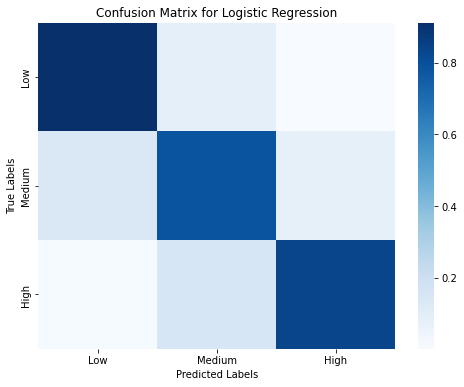

[[0.91116546 0.08712707 0.00170747]
 [0.13353878 0.78355979 0.08290143]
 [0.01168846 0.15077177 0.83753977]]


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
confusion_matrix = np.array([[39489,  3776,    74],
 [ 5720, 33563,  3551],
 [  496,  6398, 35541]])
row_sums = confusion_matrix.sum(axis=1)[:, np.newaxis]
normalized_confusion_matrix = confusion_matrix / row_sums

# Class labels
class_labels = ['Low', 'Medium', 'High']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion_matrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()
print(normalized_confusion_matrix)

#### The Logistic Regression method showed accuracy : Accuracy: 0.844 , and Average cross-validation score: 0.845
 , it means that the classifier is neither overfitting and underfitting

## Fourth: Decision Tree

Accuracy: 0.922
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94     43339
           1       0.88      0.90      0.89     42834
           2       0.94      0.94      0.94     42435

    accuracy                           0.92    128608
   macro avg       0.92      0.92      0.92    128608
weighted avg       0.92      0.92      0.92    128608

Confusion Matrix:
[[40383  2769   187]
 [ 1943 38424  2467]
 [  110  2495 39830]]


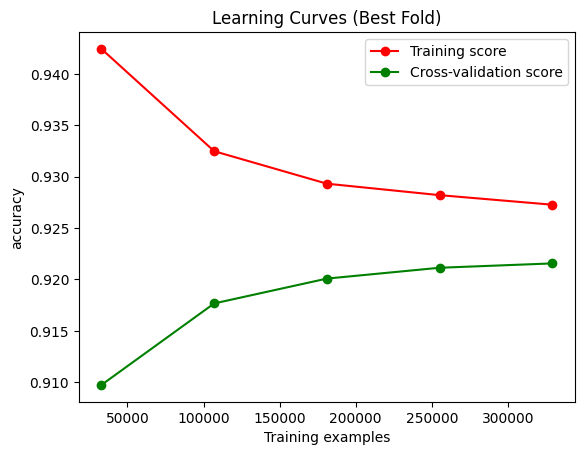

Cross-validation scores: [0.92162199 0.92150536 0.92248702 0.92210796 0.92169898]
Average cross-validation score: 0.922


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve, GridSearchCV, cross_val_score

# Load the data
df = pd.read_csv("cleaned_DataSet_4.csv")
labels = pd.read_csv("trip_price_labels.csv")
labels = labels.values.ravel()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the hyperparameter space for tuning
param_grid = {'max_depth': [3, 5, 10, 20, 50, None]}

# Initialize the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Perform grid search with cross-validation to tune the hyperparameter
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameter and the corresponding model
best_max_depth = grid_search.best_params_['max_depth']
best_model = grid_search.best_estimator_

# Evaluate the best model on the testing set
y_pred = best_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Calculate classification report
class_report = classification_report(y_test, y_pred)
print(f'Classification Report:\n{class_report}')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{conf_matrix}')

# Function to plot the best learning curve
def plot_best_learning_curve(estimator, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy'):
    best_score = -np.inf
    best_train_sizes = None
    best_train_scores = None
    best_test_scores = None

    for train_index, test_index in cv.split(X, y):
        X_train_fold, X_val_fold = X[train_index], X[test_index]
        y_train_fold, y_val_fold = y[train_index], y[test_index]
        
        train_sizes_abs, train_scores, test_scores = learning_curve(estimator, X_train_fold, y_train_fold,
                                                                    train_sizes=train_sizes, scoring=scoring, cv=None, n_jobs=None)
        mean_test_scores = np.mean(test_scores, axis=1)

        if np.mean(mean_test_scores) > best_score:
            best_score = np.mean(mean_test_scores)
            best_train_sizes = train_sizes_abs
            best_train_scores = train_scores
            best_test_scores = test_scores

    plt.figure()
    plt.plot(best_train_sizes, np.mean(best_train_scores, axis=1), 'o-', color="r", label="Training score")
    plt.plot(best_train_sizes, np.mean(best_test_scores, axis=1), 'o-', color="g", label="Cross-validation score")
    plt.xlabel('Training examples')
    plt.ylabel(scoring)
    plt.title('Learning Curves (Best Fold)')
    plt.legend(loc="best")
    plt.show()

# Prepare cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Plot the best learning curve
plot_best_learning_curve(best_model, X_train_scaled, y_train, cv=cv)

# Perform cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation scores: {cv_scores}')
print(f'Average cross-validation score: {np.mean(cv_scores):.3f}')

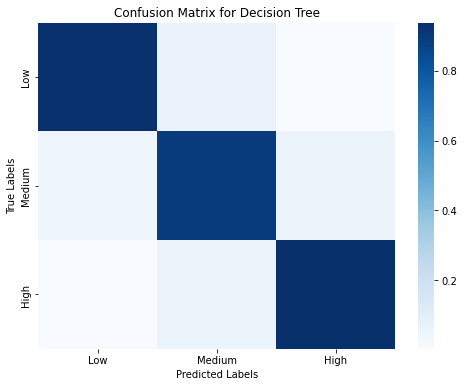

[[0.93179353 0.06389164 0.00431482]
 [0.04536116 0.8970444  0.05759443]
 [0.0025922  0.05879581 0.93861199]]


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix data
confusion_matrix = np.array([[40383,  2769,   187],
 [ 1943, 38424,  2467],
 [  110,  2495, 39830]])
row_sums = confusion_matrix.sum(axis=1)[:, np.newaxis]
normalized_confusion_matrix = confusion_matrix / row_sums

# Class labels
class_labels = ['Low', 'Medium', 'High']

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(normalized_confusion_matrix, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()
print(normalized_confusion_matrix)

## In decison Tree, 
- we do the same steps starting with Spliting the data into training and testing sets , then we use min-max scalar to fit the data before training
- then use Grid search with cross-validation to tune the hyperparameter
- after that evaluating and calculating accurecy, classification report and confusion matrix as a diagnose of the Classifier

After plotting learning curves , we notice that the data sample starts overfitting and it decreases until conversion between cross-validation and training scores 
- it shows the Accuracy: 0.9222 , and Average cross-validation score: 0.9221

## Fifth: Random First

Grid Search : Done
Best number of trees: 10
  param_n_estimators  mean_test_score  std_test_score
0                  2         0.883591        0.002115
1                  5         0.920036        0.000626
2                 10         0.925720        0.000594
Accuracy: 0.9021211744214979


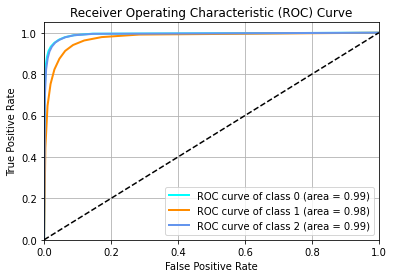

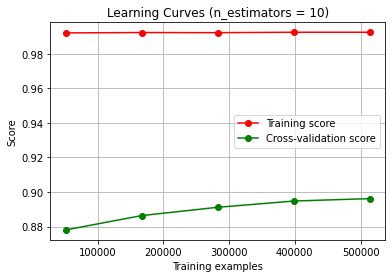

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv("cleaned_DataSet_4.csv")
labels = pd.read_csv("trip_price_labels.csv").values.ravel()

# Binarize the labels for multi-class ROC
labels_binarized = label_binarize(labels, classes=np.unique(labels))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)

# Define the parameter grid for n_estimators
param_grid = {
    'n_estimators': [2,5,10]
}

# Create and train the Random Forest model with Grid Search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Grid Search : Done")

# Get the best number of trees
best_n_estimators = grid_search.best_params_['n_estimators']
print(f"Best number of trees: {best_n_estimators}")

# Display the accuracy of each parameter value tested
results = pd.DataFrame(grid_search.cv_results_)
print(results[['param_n_estimators', 'mean_test_score', 'std_test_score']])

# Train the final model with the best number of trees using One-vs-Rest strategy
final_model_ovr = OneVsRestClassifier(RandomForestClassifier(n_estimators=best_n_estimators, random_state=42))
final_model_ovr.fit(X_train, label_binarize(y_train, classes=np.unique(labels)))

# Make predictions and calculate accuracy
y_pred = final_model_ovr.predict(X_test)
accuracy = accuracy_score(label_binarize(y_test, classes=np.unique(labels)), y_pred)
print(f"Accuracy: {accuracy}")

# Predict probabilities
y_prob = final_model_ovr.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(labels_binarized.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(label_binarize(y_test, classes=np.unique(labels))[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in zip(range(labels_binarized.shape[1]), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Plotting the learning curves
train_sizes, train_scores, test_scores = learning_curve(final_model_ovr, df, labels_binarized, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5))

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.title(f'Learning Curves (n_estimators = {best_n_estimators})')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc="best")
plt.grid()
plt.show()


## In Random Forest, 
- we do the same steps starting with Spliting the data into training and testing sets
- then use Grid search with cross-validation to tune the hyperparameter with Number of Trees (2,5,10)
- then finding best number of trees
- after that evaluating and calculating accuracy, classification report and ROC curve as a diagnose of the Classifier

After plotting learning curves , we notice that the random forest algorithm overfits the data through the whole set